In [1]:
import numpy as np
import pandas as pd
import re
from colorama import Fore, Back, Style

In [2]:
dataset = pd.read_excel('dataset/maya_dataset.xlsx', engine = 'openpyxl')

In [3]:
dataset = dataset.iloc[:, 0:2]

In [4]:
dataset.sample(5)

,posts,labels
2503,আমি একটা সম্পর্কে আছি। কিন্তু যার সাথে আছি সে ...,1
3465,২ দিন যাবত খাবারের রুচি নাই।কিছু খেতে ইচ্ছা হয়...,3
955,"হটাত কোন একটা খারাপ চিন্তা মাথায় চলে আসে,আর খু...",1
2827,২০১৮ সালের একটা ঘটনার পর থেকে আমি খুব হতাশা গ্...,4
982,কিছু দিন দরে আমি বিষন ভাবে একটা কথা বেভে বিষন ...,1


### Removing Emojis

In [5]:
df_1 = dataset.copy()

In [6]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F97A"
        u"\U00002639"
        u"\U00002764"
        u"\U0001F642"
        u"\U0001F600-\U000E007F"
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r' ',text)
for i in range(df_1.shape[0]):
    df_1.iloc[i,0] = deEmojify(df_1.iloc[i,0])

### <span style="color:darksalmon">Removing nan Fields</span>

In [7]:
df_1.isnull().sum(axis = 0)

posts     0
labels    0
dtype: int64

### <span style="color:aqua">Removing Punctuations</span>

In [8]:
df_2 = df_1.copy()

In [9]:
def depunctuate(text):
    regrex_pattern = re.compile(pattern = "["u"\/"u"\\"u"\^"u"\!"u"\@"u"\+"u"\*"u"\="u"\%"u"\&"u"\:"u"\;"u"\_"u"\."u"\,"u"\("u"\)"u"\?"u"\।"u"\|"u"'"u"\-"u"\""u"]+")
    return regrex_pattern.sub(r' ',text)
for i in range(df_2.shape[0]):
    df_2.iloc[i,0] = depunctuate(df_2.iloc[i,0])

In [10]:
df_2.sample(5)

,posts,labels
3394,আমি ইউটিউব এ বিষন্নতা নিয়ে একটি ভিডিও দেখে বু...,3
4778,আমি চরম হতাশাগ্রস্ত একজন আত্মহত্যা করে নিজেকে ...,4
401,হতাশা দূর দুশ্চিন্তা দূর করার জন্য কি করতে পারি,2
3558,আমার অনেক কষ্ট হচ্ছে খুব খারাপ লাগে সবসময় অন...,1
1707,ধন্যবাদ পরামর্শের জন্য ডিপ্রেশন তো আমার ছোট ...,2


### <span style="color:red">Removing Numbers</span>

In [11]:
df_3 = df_2.copy()

In [12]:
def denumerize(text):
    regrex_pattern = re.compile(pattern = "[0-9০১২৩৪৫৬৭৮৯]+")
    return regrex_pattern.sub(r' ',text)
for i in range(df_3.shape[0]):
    df_3.iloc[i,0] = denumerize(df_3.iloc[i,0])

In [13]:
df_3.sample(5)

,posts,labels
2188,আমার বয়স বছর অবিবাহিত আমার ছোট বোনের বিয়ে ...,2
3857,স্যার আমার কোন কাজে মন বসে না এবং অনেক সময় মনে...,1
1510,আমার শরিল ও মন সব সময় হতাস থাকে,2
2939,আপু আমি ভালো নেই কারন অনেক দিন দিন শারীরিক সম্...,1
2021,মানসিক ভাবে আমি সব সময় অবসাদে ভুগি সব সময় মাথ...,1


### <span style="color:hotpink">Discarding all Posts Beyond the Range of Acceptable Length </span>

In [14]:
df_4 = df_3.copy()

In [15]:
def remove_empty_string_literals(string_list):
    while("" in string_list) :
        string_list.remove("")
    return string_list

In [16]:
df_4['length'] = [len(remove_empty_string_literals(post.split(' '))) for post in df_4.iloc[:, 0]] 

In [17]:
df_4.sample(5)

,posts,labels,length
588,আমি ডিপ্রেশনে ভুগছি কি করা উচিত এখন,2,7
277,আমার কিছু ভালো লাগেনা মানুষের জীবন এর উদ্দেশ্য...,1,23
335,সর্বদা মন খারাপ থাকে প্রচন্ড হতাশায় ভুগছি পার...,2,23
4848,আমার নাম সাকিব বয়স বছর ইন্টার বর্ষের বিজ...,4,39
1104,মানষিক ভাবে স্বামি শাশুর কাছে অত্যাচারিত হচ্ছি...,1,11


In [18]:
# Defining an acceptable range for the length of posts -> inclusive
LOWER_BOUND = 5
UPPER_BOUND = 300
df_5 = df_4[(df_4['length'] >= LOWER_BOUND) == True]
df_5 = df_5[(df_5['length'] <= UPPER_BOUND) == True]
print(df_5.shape)

(4871, 3)


In [19]:
df_5.sample(5)

,posts,labels,length
2149,আমার বাবার শরীর খারাপ সেজন্য কিছু ভালো লাগছে না,1,9
84,আমি মানুষের সাথে মিশতে অনেক ইনসিকিউরড বোধ করি ...,3,198
4286,আমার মনটা সব সময় খারাপ থাকে কোন কিছুতে আনন্দ ...,2,17
3460,আমার খুব কষ্ট হচ্ছে খুব কাদতে ইচ্ছা করে আমার...,1,15
1546,মানে আমি সিদ্ধান্ত হীনতায় ভুগছি সিদ্ধান্ত ন...,1,23


### <span style="color:orange">Tokenizing Dataset</span>

In [20]:
from bnlp import BasicTokenizer
tokenizer = BasicTokenizer()
# Replace df_5 with df_x to revert the effects of text cleaning
x, y = df_5.iloc[:, 0:1].values, df_5.iloc[:, 1:2].values
x = x.tolist()
for i in range(len(x)):
    x[i] = tokenizer.tokenize(x[i][0])

### <span style="color:deeppink">Visualizing Word Frequency Distribution</span>

In [21]:
words = [word for words in x for word in words]

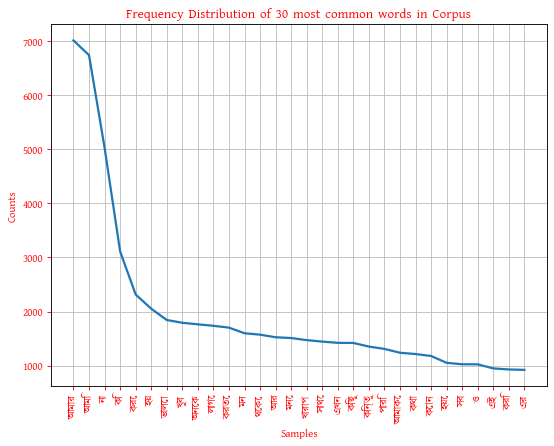

In [22]:
from nltk.probability import FreqDist
import matplotlib
import matplotlib.font_manager as font_manager
from matplotlib import rcParams
from matplotlib.pyplot import figure

matplotlib.rcParams.update(matplotlib.rcParamsDefault)
figure(figsize=(8, 6), dpi=80)
font_dir = ['kalpurush/']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
rcParams['font.family'] = 'kalpurush'
rcParams.update({'text.color' : "red",
                 'axes.labelcolor' : "red",
                 'xtick.color' : "red",
                 'ytick.color' : "red",
                 'xtick.minor.width' : 2})
freq_dist = FreqDist(words)
freq_dist.plot(30, title = "Frequency Distribution of 30 most common words in Corpus")
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

### <span style="color:gold">Visualizing Post Length Frequency Distribution</span>

In [23]:
lens = [len(posts) for posts in x]
lens = pd.Series(lens, name = "post length")

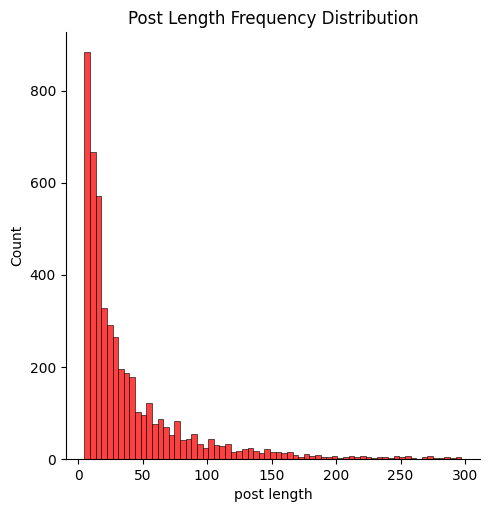

In [24]:
import seaborn as sns
sns.displot(lens, color = 'r').set(title = 'Post Length Frequency Distribution')
import matplotlib.pyplot as plt
plt.show()

### <span style="color:deepskyblue">Visualizing Label Counts</span>

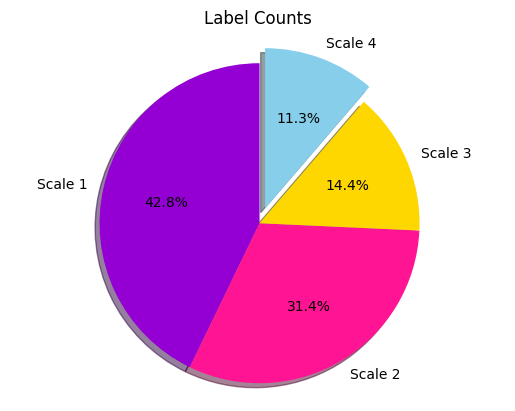

In [25]:
counts = df_3['labels'].value_counts().to_dict()
import matplotlib.pyplot as plt
labels = 'Scale 1', 'Scale 2', 'Scale 3', 'Scale 4'
sizes = [counts[1], counts[2], counts[3], counts[4]]
colors = ['#9400D3','#FF1493','#FFD700','#87CEEB']
explode = (0, 0, 0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, 
        autopct = '%1.1f%%', 
        shadow = True, 
        startangle = 90,
        colors = colors)
ax1.axis('equal')
plt.title('Label Counts')
plt.show()

### <span style="color:crimson">Spell Correction using FastText</span>

<font>Source:
    https://medium.com/analytics-vidhya/bengali-word-spelling-correction-using-pre-trained-word2vec-1f9938f48b09
</font>

- letters = The Bengali script has a total of 9 vowels. Each of which is called a ‘স্বরবর্ণ’. Also, have 35 consonants that are known as ‘ব্যঞ্জনবর্ণ ‘.

- splits = It is working as a list which has both forward and reverses orders of the word sequence.

- deletes = Also, a list which checks the left and right of a word in splits list and deletes the incorrect syntax.

- transposes = It is used to change word places with each other words using the splits list.

- replaces = Is a list it put words back in a previous place or position.

- inserts = It helps to place and fit the correct words into the replacing with the incorrect word, especially with care.

In [26]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('models/cc.bn.300.vec')

In [27]:
words = model.index_to_key
word_rank = {}
for index, word in enumerate(words):
    word_rank[word] = index

In [28]:
# This methods returns the value for the given key, if present in the dictionary using the get() method
def P(word): 
    return - word_rank.get(word, 0)

#  It returns the maximum candidates words with a key which is defined by P
def correction(word): 
    return max(candidates(word), key=P)

# The absolute candidate of the wrong word could found from known() methods is the actual work of this function.
def candidates(word): 
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

# This method is used to find out the set of a word which is present in the dictionary
def known(words): 
    return set(w for w in words if w in word_rank)

# Many parameters such as deletes, transposes, replaces, inserts are used in this method.
# Those parameters return the correct word of an incorrect word in a sentence.
# A set() function is used to find out the unordered collection of words
def edits1(word):
    letters    = 'ঁংঃঅআইঈউঊঋএঐওঔকখগঘঙচছজঝঞটঠডঢণতথদধনপফবভমযরলশষসহ়ঽািীুূৃৄেৈোৌ্ৎৗড়ঢ়য়'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)
    
#  This method is returend the word which is edited by in edits1() functions
def edits2(word): 
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [29]:
def spell_correction(sentence):
    corrected_sentence = []
    for word in sentence:
        corrected_sentence.append(correction(word))
    return re.sub(' +' ,' ', ' '.join(corrected_sentence))

In [30]:
from bnlp import BasicTokenizer
tokenizer = BasicTokenizer()
x = df_5.iloc[:, 0:1].values
x = x.tolist()
for i in range(len(x)):
    x[i] = tokenizer.tokenize(x[i][0])
for i in range(df_5.shape[0]):
    df_5.iloc[i, 0] = spell_correction(x[i])

In [31]:
df_5.sample(5)

,posts,labels,length
4632,না না এত ভাবলে চলবে না আমাকে মরতেই হবে আমার হা...,4,38
4672,আমি অনেক দিন ধরে মানসিক সমস্যায় ভুগছি আগেই বলে...,4,151
1014,বেশ কিছুদিন যাবত পরিবারের আর্থিক সমস্যার সম্মু...,2,25
4426,আমার আজ অনেক দিন ধরেই মোনটা ভিশন খারাপ লাগে আম...,1,75
1066,আমার মাঝে মাঝে খুব কষ্ট হয় কাউকে কিছু বলতে পার...,3,43


### <span style="color:coral">Removing Stopwords</span>

In [32]:
from bnlp.corpus.util import remove_stopwords

In [33]:
file = open('stopwords/stopwords-bn.txt', encoding = 'utf-8')
stopwords = []
for line in file:
    stopwords.append(line.strip())
file.close()
stopwords = list(filter(None, stopwords))

In [34]:
df_6 = df_5.iloc[:, 0:2].copy()

In [35]:
 for i in range(df_6.shape[0]):
     df_6.iloc[i, 0] = ' '.join(remove_stopwords(df_6.iloc[i, 0], stopwords))

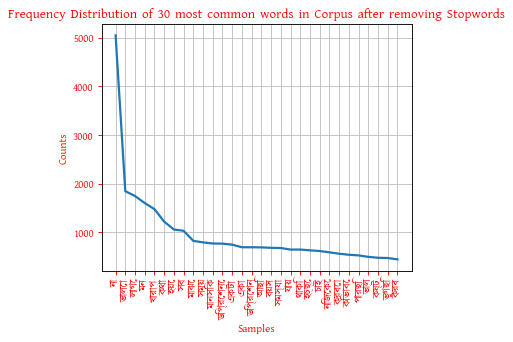

In [36]:
# Revisualizing Word Frequency Distribution after removing Stopwords
from bnlp import BasicTokenizer
tokenizer = BasicTokenizer()
# Replace df_5 with df_x to revert the effects of text cleaning
x, y = df_6.iloc[:, 0:1].values, df_6.iloc[:, 1:2].values
x = x.tolist()
for i in range(len(x)):
    x[i] = tokenizer.tokenize(x[i][0])

words = [word for words in x for word in words]

matplotlib.rcParams.update(matplotlib.rcParamsDefault)
figure(figsize=(5, 4), dpi=80)
font_dir = ['kalpurush/']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
rcParams['font.family'] = 'kalpurush'
rcParams.update({'text.color' : "red",
                 'axes.labelcolor' : "red",
                 'xtick.color' : "red",
                 'ytick.color' : "red",
                 'xtick.minor.width' : 2})
freq_dist = FreqDist(words)
freq_dist.plot(30, title = "Frequency Distribution of 30 most common words in Corpus after removing Stopwords")
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

### <span style="color:gold">Creating Sparse Matrix</span>

In [37]:
corpus = df_6.iloc[:, 0].values
y = df_6.iloc[:, 1].values

In [38]:
df_6.sample(5)

,posts,labels
79,আপু দুইদিন কেমন মন খারাপ লাগছে চিন্তা করিনা এর...,2
3349,ডিপ্রেশন থাকি করব,2
1536,মাস ডিপ্রেশনে রয়েছি এমনকি ডিপ্রেশনের কারনে আত্...,4
1010,বয়স বাচ্চা যাবৎ জটিলতায় মানুসিক বিপর্যস্ত মাত্...,3
1682,মানসিক আসাদ,1


In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(corpus, y, test_size=0.2)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000)
x_train = cv.fit_transform(x_train).toarray()
x_test = cv.transform(x_test)

### <span style="color:cyan">Creating TF-IDF Feature Vector</span>

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
x_tfidf_train, x_tfidf_test, y_tfidf_train, y_tfidf_test=train_test_split(corpus, y, test_size=0.2)

In [41]:
tf_idf = TfidfVectorizer(encoding = 'utf-8', lowercase = False, norm = 'l2', sublinear_tf = True, min_df = 2, ngram_range = (1, 2))
x_tfidf_train = tf_idf.fit_transform(x_tfidf_train).toarray().tolist()
x_tfidf_test = tf_idf.transform(x_tfidf_test).toarray().tolist()

### <span style="color:purple">Classification using Naive Bayes</span>

In [46]:

from sklearn.naive_bayes import ComplementNB
classifier = ComplementNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [47]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print('Classification Report', cr, sep = '\n')
print('Confusion Matrix', cm, '', sep = '\n')
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print(Fore.RED+'F1 score (macro):', f1_score(y_test, y_pred, average = 'macro'))
print(Fore.RED+'F1 score (weighted):', f1_score(y_test, y_pred, average = 'weighted'))
print(Fore.RED+'F1 score (micro):', f1_score(y_test, y_pred, average = 'micro'))
print(Fore.RED+'Accuracy:', accuracy_score(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.74      0.69      0.71       409
           2       0.66      0.67      0.66       310
           3       0.47      0.43      0.45       146
           4       0.53      0.72      0.61       110

    accuracy                           0.65       975
   macro avg       0.60      0.63      0.61       975
weighted avg       0.65      0.65      0.65       975

Confusion Matrix
[[281  55  38  35]
 [ 54 207  26  23]
 [ 31  39  63  13]
 [ 12  13   6  79]]

F1 score (macro): 0.6092177356295383
F1 score (weighted): 0.6466905944962515
F1 score (micro): 0.6461538461538462
Accuracy: 0.6461538461538462


### <span style="color:red">Classification with SVM using GridSearchCV</span>

- <span style="color:blue">Using Bag of Words</span>

In [48]:
corpus = df_6.iloc[:, 0].values
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(corpus).toarray()
y = df_6.iloc[:, 1].values
## Label encoding Y
#from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder(handle_unknown = 'ignore')
# enc.fit(y)
# y = enc.transform(y).toarray()[:, :-1]

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.20)

In [62]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
parameters = [{'C' : [0.1, 1, 10], 'kernel' : ['linear',], 'decision_function_shape' : ['ovo']},
              {'C' : [52, 55, 57], 'kernel' : ['rbf',], 'gamma' : [ 0.008], 'decision_function_shape' : ['ovo']},
#              {'C' : [0.1, 1, 10, 100, 500, 1000], 'kernel' : ['poly',], 'degree' : [2, 3, 4, 5, 6], 'gamma' : [0.1,0.3,0.5,0.7,0.9], 'coef0' : [1, 10, 50, 100]},
#              {'C' : [0.1, 1, 10, 100, 500, 1000], 'kernel' : ['sigmoid',], 'gamma' : [0.1,0.3,0.5,0.7,0.9], 'coef0' : [0.0, 0.5, 1, 10, 50, 100]},
             ]

In [63]:
grid_search = GridSearchCV(estimator = SVC(probability = False, verbose = True), param_grid = parameters, scoring = 'f1_macro', cv = 5, n_jobs = 5, verbose = 5)
grid_search = grid_search.fit(x_train, y_train)
best_score = grid_search.best_score_
best_parameters = grid_search.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]...*..*
optimization finished, #iter = 4155
obj = -65.543225, rho = -1.046422
nSV = 928, nBSV = 654
..*.*
optimization finished, #iter = 4811
obj = -65.906882, rho = -1.033680
nSV = 943, nBSV = 664
......*..*
optimization finished, #iter = 4091
obj = -63.126934, rho = -1.048276
nSV = 901, nBSV = 633
*..*
optimization finished, #iter = 4036
obj = -63.667185, rho = -1.040128
nSV = 910, nBSV = 642
*..*
optimization finished, #iter = 4282
obj = -65.856670, rho = -1.055056
nSV = 931, nBSV = 659
.*.*
optimization finished, #iter = 2773
obj = -39.316772, rho = -1.316625
nSV = 612, nBSV = 380
..*.*
optimization finished, #iter = 3028
obj = -39.581259, rho = -1.270871
nSV = 617, nBSV = 387
.*.*
optimization finished, #iter = 2148
obj = -22.173026, rho = -1.307440
nSV = 426, nBSV = 216
.*.*
optimization finished, #iter = 2313
obj = -21.906507, rho = -1.298559
nSV = 414, nBSV = 205
..*
optimization

In [65]:
print(best_score)
print(best_parameters)

0.6863396775360535
{'C': 55, 'decision_function_shape': 'ovo', 'gamma': 0.008, 'kernel': 'rbf'}


✅ <span style="color:red">rbf kernel(bow)</span>

In [66]:
from sklearn.svm import SVC
classifier = SVC(verbose = True, decision_function_shape = 'ovo', C = 55, kernel = 'rbf', gamma = 0.008)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print('Classification Report', cr, sep = '\n')
print('Confusion Matrix', cm, '', sep = '\n')
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print(Fore.RED+'F1 score (macro):', f1_score(y_test, y_pred, average = 'macro'))
print(Fore.RED+'F1 score (weighted):', f1_score(y_test, y_pred, average = 'weighted'))
print(Fore.RED+'F1 score (micro):', f1_score(y_test, y_pred, average = 'micro'))
print(Fore.RED+'Accuracy:', accuracy_score(y_test, y_pred))

[LibSVM]......*...*
optimization finished, #iter = 9925
obj = -21601.747570, rho = -2.525325
nSV = 998, nBSV = 322
....*..*
optimization finished, #iter = 6893
obj = -9873.073094, rho = -0.350872
nSV = 777, nBSV = 114
..*.*
optimization finished, #iter = 3906
obj = -4346.564932, rho = -0.973998
nSV = 500, nBSV = 46
.....*...*
optimization finished, #iter = 8207
obj = -15371.878714, rho = 1.693219
nSV = 882, nBSV = 216
..*.*
optimization finished, #iter = 3890
obj = -4685.431309, rho = 0.529583
nSV = 470, nBSV = 49
..*.*
optimization finished, #iter = 3273
obj = -4207.423393, rho = -0.242180
nSV = 502, nBSV = 43
Total nSV = 2373
Classification Report
              precision    recall  f1-score   support

           1       0.75      0.89      0.81       413
           2       0.76      0.71      0.73       314
           3       0.58      0.44      0.50       125
           4       0.76      0.60      0.67       123

    accuracy                           0.74       975
   macro avg    

✅ <span style="color:red">linear kernel(bow)</span>

In [67]:
from sklearn.svm import SVC
classifier = SVC(verbose = True, decision_function_shape = 'ovo', C = 1, kernel = 'linear')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print('Classification Report', cr, sep = '\n')
print('Confusion Matrix', cm, '', sep = '\n')
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print(Fore.RED+'F1 score (macro):', f1_score(y_test, y_pred, average = 'macro'))
print(Fore.RED+'F1 score (weighted):', f1_score(y_test, y_pred, average = 'weighted'))
print(Fore.RED+'F1 score (micro):', f1_score(y_test, y_pred, average = 'micro'))
print(Fore.RED+'Accuracy:', accuracy_score(y_test, y_pred))

[LibSVM].............*...............*........*
optimization finished, #iter = 35719
obj = -517.177156, rho = -1.296827
nSV = 918, nBSV = 449
...........*.....*
optimization finished, #iter = 16382
obj = -258.942919, rho = -1.625102
nSV = 632, nBSV = 187
.....*...*
optimization finished, #iter = 8577
obj = -95.540634, rho = -1.736411
nSV = 404, nBSV = 55
.............*........*
optimization finished, #iter = 21677
obj = -370.523192, rho = -1.181542
nSV = 764, nBSV = 313
.....*..*
optimization finished, #iter = 7794
obj = -102.585163, rho = -1.309243
nSV = 379, nBSV = 66
......*...*
optimization finished, #iter = 9102
obj = -99.998286, rho = -0.743530
nSV = 386, nBSV = 62
Total nSV = 2131
Classification Report
              precision    recall  f1-score   support

           1       0.73      0.87      0.80       413
           2       0.75      0.68      0.71       314
           3       0.56      0.40      0.47       125
           4       0.73      0.63      0.68       123

    accur

- <span style="color:blue">Using Tf-idf</span>

In [49]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
parameters = [
                # {'C' : [1, ], 'kernel' : ['linear',], 'decision_function_shape' : ['ovo']},
                {'C' : [100, 125 ], 'kernel' : ['rbf',], 'gamma' : [ 0.008, 0.01], 'decision_function_shape' : ['ovo']},
#              {'C' : [0.1, 1, 10, 100, 500, 1000], 'kernel' : ['poly',], 'degree' : [2, 3, 4, 5, 6], 'gamma' : [0.1,0.3,0.5,0.7,0.9], 'coef0' : [1, 10, 50, 100]},
#              {'C' : [0.1, 1, 10, 100, 500, 1000], 'kernel' : ['sigmoid',], 'gamma' : [0.1,0.3,0.5,0.7,0.9], 'coef0' : [0.0, 0.5, 1, 10, 50, 100]},
            ]
grid_search = GridSearchCV(estimator = SVC(probability = False, verbose = True), param_grid = parameters, scoring = 'f1_macro', cv = 5, n_jobs = 2, verbose = 5)
grid_search = grid_search.fit(x_tfidf_train, y_tfidf_train)
best_score = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_score)
print(best_parameters)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[LibSVM][LibSVM]....*..*
optimization finished, #iter = 4289
obj = -44674.635063, rho = 0.631375
nSV = 1330, nBSV = 320
*.*
optimization finished, #iter = 3813
obj = -43650.014815, rho = 0.493271
nSV = 1306, nBSV = 302
..*.*
optimization finished, #iter = 2879
obj = -32207.347279, rho = -2.032463
nSV = 1048, nBSV = 212
*.*
optimization finished, #iter = 2494
obj = -31558.024057, rho = -2.038311
nSV = 1003, nBSV = 200
..*.*
optimization finished, #iter = 2177
obj = -19302.542278, rho = -2.896401
nSV = 833, nBSV = 105
*.*
optimization finished, #iter = 2228
obj = -20095.585919, rho = -2.074238
nSV = 857, nBSV = 108
..*.*.*
optimization finished, #iter = 2577
obj = -36718.010285, rho = -1.393164
nSV = 1027, nBSV = 254
*
optimization finished, #iter = 2633
obj = -38251.572270, rho = -1.451355
nSV = 1011, nBSV = 282
.*
optimization finished, #iter = 1714
obj = -17530.963599, rho = -2.440928
nSV = 708, nBSV = 90
.*
optimization fini

✅ <span style="color:red">linear kernel(tf-idf)</span>

In [47]:
from sklearn.svm import SVC
classifier = SVC(verbose = True, decision_function_shape = 'ovo', C = 1, kernel = 'linear')
classifier.fit(x_tfidf_train, y_tfidf_train)
y_tfidf_pred = classifier.predict(x_tfidf_test)
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_tfidf_test, y_tfidf_pred)
cr = classification_report(y_tfidf_test, y_tfidf_pred)
print('Classification Report', cr, sep = '\n')
print('Confusion Matrix', cm, '', sep = '\n')
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print(Fore.RED+'F1 score (macro):', f1_score(y_tfidf_test, y_tfidf_pred, average = 'macro'))
print(Fore.RED+'F1 score (weighted):', f1_score(y_tfidf_test, y_tfidf_pred, average = 'weighted'))
print(Fore.RED+'F1 score (micro):', f1_score(y_tfidf_test, y_tfidf_pred, average = 'micro'))
print(Fore.RED+'Accuracy:', accuracy_score(y_tfidf_test, y_tfidf_pred))

[LibSVM]..*.*
optimization finished, #iter = 3728
obj = -700.278736, rho = -1.014002
nSV = 1591, nBSV = 631
.*.*
optimization finished, #iter = 2484
obj = -514.075714, rho = -1.242069
nSV = 1238, nBSV = 450
.*.*
optimization finished, #iter = 2138
obj = -325.149674, rho = -1.316827
nSV = 973, nBSV = 245
.*.*
optimization finished, #iter = 2244
obj = -598.534283, rho = -0.685742
nSV = 1237, nBSV = 562
.*
optimization finished, #iter = 1773
obj = -298.326112, rho = -0.875182
nSV = 874, nBSV = 228
*.*
optimization finished, #iter = 1360
obj = -294.429373, rho = -0.576621
nSV = 745, nBSV = 241
Total nSV = 3020
Classification Report
              precision    recall  f1-score   support

           1       0.80      0.92      0.86       414
           2       0.77      0.80      0.78       331
           3       0.63      0.32      0.42       135
           4       0.83      0.74      0.78        95

    accuracy                           0.78       975
   macro avg       0.76      0.69     

✅ <span style="color:red">rbf kernel(tf-idf)</span>

In [48]:
from sklearn.svm import SVC
classifier = SVC(verbose = True, decision_function_shape = 'ovo', C = 100, kernel = 'rbf', gamma = 0.008)
classifier.fit(x_tfidf_train, y_tfidf_train)
y_tfidf_pred = classifier.predict(x_tfidf_test)
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_tfidf_test, y_tfidf_pred)
cr = classification_report(y_tfidf_test, y_tfidf_pred)
print('Classification Report', cr, sep = '\n')
print('Confusion Matrix', cm, '', sep = '\n')
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print(Fore.RED+'F1 score (macro):', f1_score(y_tfidf_test, y_tfidf_pred, average = 'macro'))
print(Fore.RED+'F1 score (weighted):', f1_score(y_tfidf_test, y_tfidf_pred, average = 'weighted'))
print(Fore.RED+'F1 score (micro):', f1_score(y_tfidf_test, y_tfidf_pred, average = 'micro'))
print(Fore.RED+'Accuracy:', accuracy_score(y_tfidf_test, y_tfidf_pred))

[LibSVM]...*.*
optimization finished, #iter = 4717
obj = -54079.759021, rho = -1.070962
nSV = 1527, nBSV = 394
..*.*
optimization finished, #iter = 3234
obj = -38968.441064, rho = -2.106238
nSV = 1202, nBSV = 272
.*.*
optimization finished, #iter = 2581
obj = -23806.717597, rho = -2.952009
nSV = 956, nBSV = 131
..*.*
optimization finished, #iter = 3370
obj = -46108.757559, rho = -1.456159
nSV = 1228, nBSV = 342
.*.*
optimization finished, #iter = 2214
obj = -21524.220248, rho = -2.432072
nSV = 852, nBSV = 117
.*
optimization finished, #iter = 1658
obj = -20962.777248, rho = -1.304372
nSV = 728, nBSV = 109
Total nSV = 2997
Classification Report
              precision    recall  f1-score   support

           1       0.80      0.92      0.85       414
           2       0.77      0.77      0.77       331
           3       0.64      0.36      0.46       135
           4       0.80      0.74      0.77        95

    accuracy                           0.77       975
   macro avg       0.7

### <span style="color:pink">Random Forest + TF-IDF</span>

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight = 'balanced',
                                                 classes = np.unique(np.reshape(y_tfidf_train, y_tfidf_train.shape[0])),
                                                 y = np.reshape(y_tfidf_train, y_tfidf_train.shape[0]))
class_weights = {1 : class_weights[0],
               2 : class_weights[1],
               3 : class_weights[2],
               4 : class_weights[3]}
classifier = RandomForestClassifier(n_estimators = 8000, verbose = 1, class_weight = class_weights,
                                    n_jobs = 3)
classifier.fit(x_tfidf_train, y_tfidf_train)
y_tfidf_pred = classifier.predict(x_tfidf_test)
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_tfidf_test, y_tfidf_pred)
cr = classification_report(y_tfidf_test, y_tfidf_pred)
print('Classification Report', cr, sep = '\n')
print('Confusion Matrix', cm, '', sep = '\n')
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print(Fore.RED+'F1 score (macro):', f1_score(y_tfidf_test, y_tfidf_pred, average = 'macro'))
print(Fore.RED+'F1 score (weighted):', f1_score(y_tfidf_test, y_tfidf_pred, average = 'weighted'))
print(Fore.RED+'F1 score (micro):', f1_score(y_tfidf_test, y_tfidf_pred, average = 'micro'))
print(Fore.RED+'Accuracy:', accuracy_score(y_tfidf_test, y_tfidf_pred))

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    1.2s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    5.5s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:   12.7s
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:   22.4s
[Parallel(n_jobs=3)]: Done 1244 tasks      | elapsed:   35.0s
[Parallel(n_jobs=3)]: Done 1794 tasks      | elapsed:   50.2s
[Parallel(n_jobs=3)]: Done 2444 tasks      | elapsed:  1.1min
[Parallel(n_jobs=3)]: Done 3194 tasks      | elapsed:  1.5min
[Parallel(n_jobs=3)]: Done 4044 tasks      | elapsed:  1.9min
[Parallel(n_jobs=3)]: Done 4994 tasks      | elapsed:  2.3min
[Parallel(n_jobs=3)]: Done 6044 tasks      | elapsed:  2.8min
[Parallel(n_jobs=3)]: Done 7194 tasks      | elapsed:  3.3min
[Parallel(n_jobs=3)]: Done 8000 out of 8000 | elapsed:  3.7min finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  

Classification Report
              precision    recall  f1-score   support

           1       0.75      0.94      0.83       422
           2       0.68      0.78      0.73       291
           3       0.74      0.12      0.21       136
           4       0.96      0.68      0.80       126

    accuracy                           0.74       975
   macro avg       0.78      0.63      0.64       975
weighted avg       0.75      0.74      0.71       975

Confusion Matrix
[[396  23   2   1]
 [ 60 227   3   1]
 [ 46  71  17   2]
 [ 26  13   1  86]]

F1 score (macro): 0.6425542462025083
F1 score (weighted): 0.7103715191607466
F1 score (micro): 0.7446153846153846
Accuracy: 0.7446153846153846


[Parallel(n_jobs=3)]: Done 8000 out of 8000 | elapsed:    2.4s finished


### <span style="color:purple">Logistic Regression + TF-IDF</span>

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight = 'balanced',
                                                 classes = np.unique(np.reshape(y_tfidf_train, y_tfidf_train.shape[0])),
                                                 y = np.reshape(y_tfidf_train, y_tfidf_train.shape[0]))
class_weights = {1 : class_weights[0],
               2 : class_weights[1],
               3 : class_weights[2],
               4 : class_weights[3]}
classifier = LogisticRegression(verbose = 0, class_weight = class_weights, multi_class = 'multinomial')
classifier.fit(x_tfidf_train, y_tfidf_train)
y_tfidf_pred = classifier.predict(x_tfidf_test)
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_tfidf_test, y_tfidf_pred)
cr = classification_report(y_tfidf_test, y_tfidf_pred)
print('Classification Report', cr, sep = '\n')
print('Confusion Matrix', cm, '', sep = '\n')
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print(Fore.RED+'F1 score (macro):', f1_score(y_tfidf_test, y_tfidf_pred, average = 'macro'))
print(Fore.RED+'F1 score (weighted):', f1_score(y_tfidf_test, y_tfidf_pred, average = 'weighted'))
print(Fore.RED+'F1 score (micro):', f1_score(y_tfidf_test, y_tfidf_pred, average = 'micro'))
print(Fore.RED+'Accuracy:', accuracy_score(y_tfidf_test, y_tfidf_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.83      0.84      0.84       422
           2       0.78      0.68      0.73       291
           3       0.44      0.56      0.49       136
           4       0.79      0.76      0.78       126

    accuracy                           0.75       975
   macro avg       0.71      0.71      0.71       975
weighted avg       0.76      0.75      0.75       975

Confusion Matrix
[[356  16  38  12]
 [ 42 199  45   5]
 [ 19  33  76   8]
 [ 10   6  14  96]]

F1 score (macro): 0.7095365590959908
F1 score (weighted): 0.7500066705024153
F1 score (micro): 0.7456410256410257
Accuracy: 0.7456410256410256


### <span style="color:skyblue">KNN Classifier + TF-IDF</span>

In [74]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(x_tfidf_train, y_tfidf_train)
y_tfidf_pred = classifier.predict(x_tfidf_test)
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_tfidf_test, y_tfidf_pred)
cr = classification_report(y_tfidf_test, y_tfidf_pred)
print('Classification Report', cr, sep = '\n')
print('Confusion Matrix', cm, '', sep = '\n')
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print(Fore.RED+'F1 score (macro):', f1_score(y_tfidf_test, y_tfidf_pred, average = 'macro'))
print(Fore.RED+'F1 score (weighted):', f1_score(y_tfidf_test, y_tfidf_pred, average = 'weighted'))
print(Fore.RED+'F1 score (micro):', f1_score(y_tfidf_test, y_tfidf_pred, average = 'micro'))
print(Fore.RED+'Accuracy:', accuracy_score(y_tfidf_test, y_tfidf_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.48      0.99      0.64       422
           2       0.89      0.28      0.43       291
           3       1.00      0.02      0.04       136
           4       1.00      0.02      0.03       126

    accuracy                           0.52       975
   macro avg       0.84      0.33      0.29       975
weighted avg       0.74      0.52      0.42       975

Confusion Matrix
[[419   3   0   0]
 [209  82   0   0]
 [129   4   3   0]
 [121   3   0   2]]

F1 score (macro): 0.2868073214154123
F1 score (weighted): 0.4168630154155292
F1 score (micro): 0.518974358974359
Accuracy: 0.518974358974359
